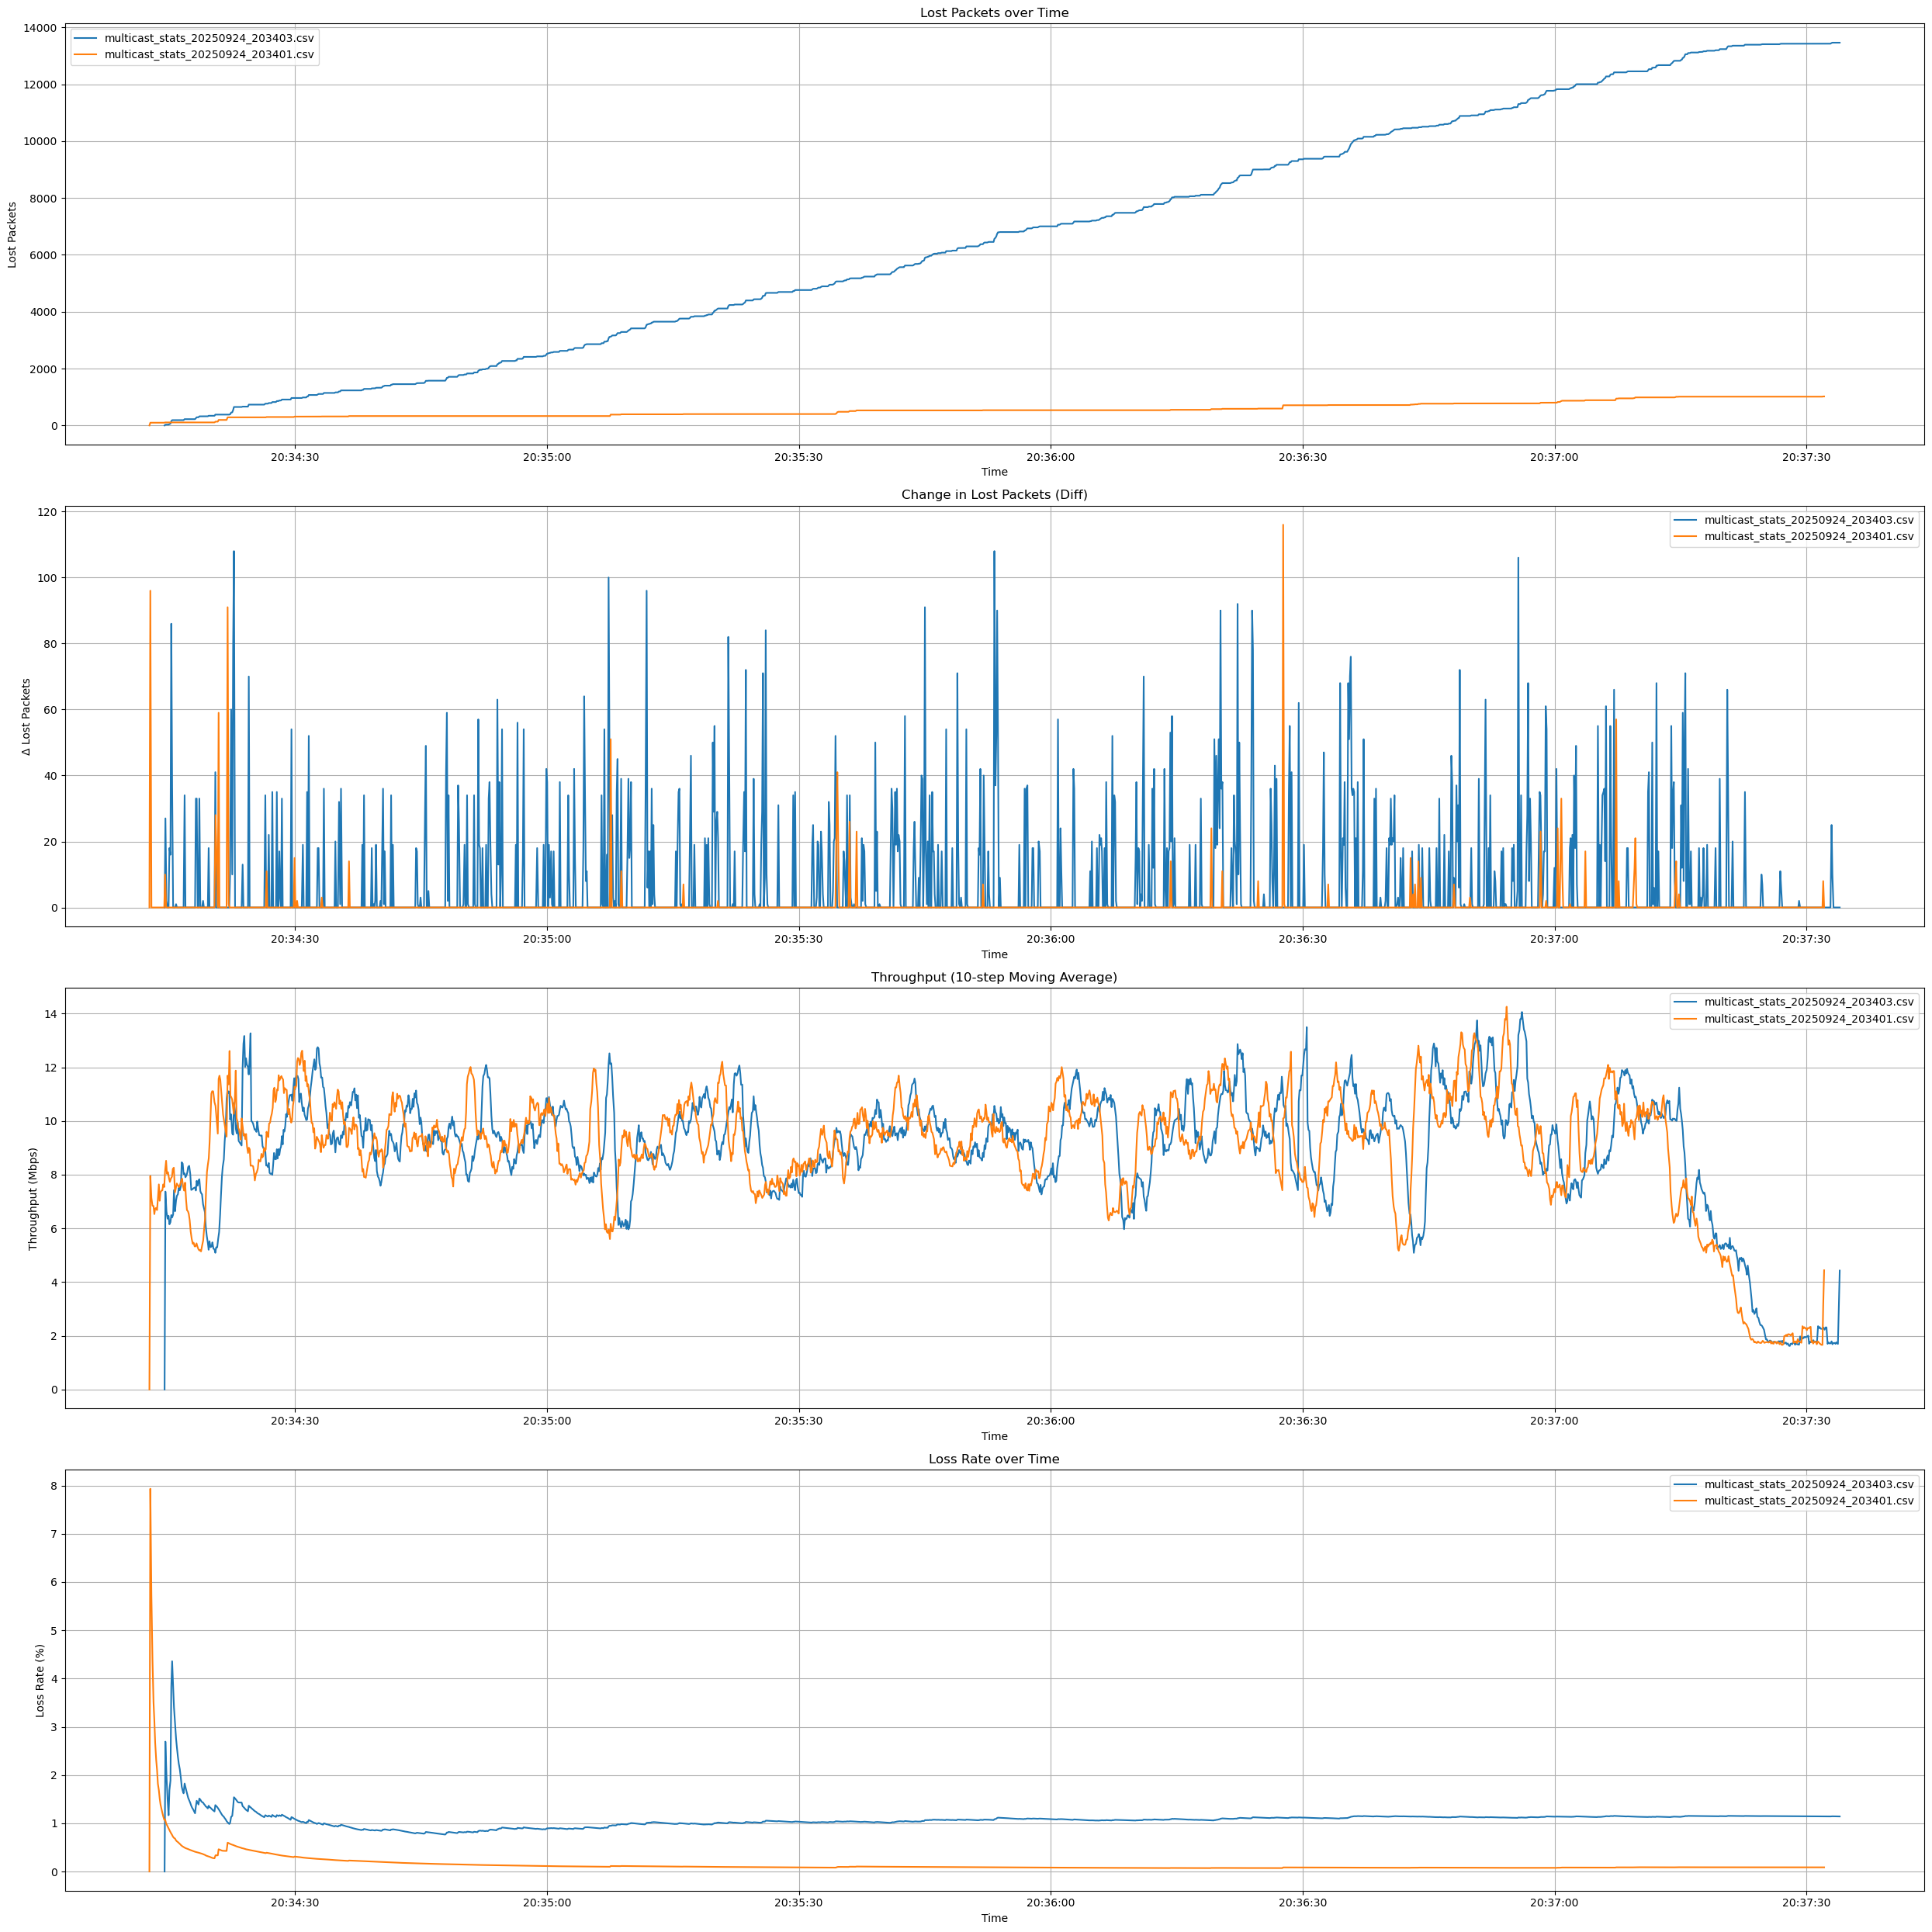

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# CSV 파일들이 들어있는 폴더 경로
folder_path = "./"   # 폴더 경로
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 그래프 겹쳐서 그리기
plt.figure(figsize=(25, 25))

# 1. LostPackets
plt.subplot(4, 1, 1)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "LostPackets" in df.columns:
        plt.plot(df["Timestamp"], df["LostPackets"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Lost Packets")
plt.title("Lost Packets over Time")
plt.legend()
plt.grid(True)

# 2. LostPackets diff
plt.subplot(4, 1, 2)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "LostPackets" in df.columns:
        df["LostPacketsDiff"] = df["LostPackets"].diff().fillna(0)
        plt.plot(df["Timestamp"], df["LostPacketsDiff"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Δ Lost Packets")
plt.title("Change in Lost Packets (Diff)")
plt.legend()
plt.grid(True)

# 3. Throughput MA
plt.subplot(4, 1, 3)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "Throughput(Mbps)" in df.columns:
        df["ThroughputMA"] = df["Throughput(Mbps)"].rolling(window=10, min_periods=1).mean()
        plt.plot(df["Timestamp"], df["ThroughputMA"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput (10-step Moving Average)")
plt.legend()
plt.grid(True)

# 4. LossRate
plt.subplot(4, 1, 4)
for file in csv_files:
    df = pd.read_csv(file)
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    if "LossRate(%)" in df.columns:
        plt.plot(df["Timestamp"], df["LossRate(%)"], label=f"{os.path.basename(file)}")
plt.xlabel("Time")
plt.ylabel("Loss Rate (%)")
plt.title("Loss Rate over Time")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
